In [1]:
# to handel missing values
from sklearn.impute import SimpleImputer 

# to handel feature scaling
from sklearn.preprocessing import StandardScaler

# for ordinal encoding
from sklearn.preprocessing import OrdinalEncoder , OneHotEncoder

# to build pipeline

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

import pandas as pd
import numpy as np

import pickle , os


import matplotlib as plt
import seaborn as sns


In [2]:
df = pd.read_csv(r"D:\ineuron\practice\ML_projects\project_tasks\deliverytime_ML_model\data\processed\final_processed_data.csv")

In [3]:
len(df.columns)

19

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24728 entries, 0 to 24727
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Delivery_person_Age          24728 non-null  float64
 1   Delivery_person_Ratings      24728 non-null  float64
 2   Restaurant_latitude          24728 non-null  float64
 3   Restaurant_longitude         24728 non-null  float64
 4   Delivery_location_latitude   24728 non-null  float64
 5   Delivery_location_longitude  24728 non-null  float64
 6   Weather_conditions           24728 non-null  object 
 7   Road_traffic_density         24728 non-null  object 
 8   Vehicle_condition            24728 non-null  int64  
 9   Type_of_order                24728 non-null  object 
 10  Type_of_vehicle              24728 non-null  object 
 11  multiple_deliveries          24728 non-null  float64
 12  Festival                     24728 non-null  object 
 13  City            

In [5]:
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),Time_Orderd_hour,Time_Orderd_minute,Time_Order_picked_hour,Time_Order_picked_minute
0,36.0,4.2,30.327968,78.046106,30.397968,78.116106,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46,21,55,22,10
1,21.0,4.7,10.003064,76.307589,10.043064,76.347589,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23,14,55,22,10
2,34.0,4.3,30.899584,75.809346,30.919584,75.829346,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20,9,20,22,10
3,24.0,4.7,26.463504,80.372929,26.593504,80.502929,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41,19,50,22,10
4,29.0,4.5,19.176269,72.836721,19.266269,72.926721,Sandstorms,Jam,2,Buffet,electric_scooter,1.0,No,Metropolitian,20,20,25,22,10


In [6]:
# Weather_conditions , Road_traffic_density, Type_of_order, Type_of_vehicle,Festival,City
# df[['Weather_conditions' , 'Road_traffic_density', 'Type_of_order', 'Type_of_vehicle','Festival','City']]


In [7]:

numerical_columns = x.select_dtypes(exclude = "object")
cat_for_ord_columns = df[["Weather_conditions","Road_traffic_density", "Festival"]]
cat_for_ohe_columns = df[['Type_of_order', 'Type_of_vehicle', 'City']]
categorical_columns =  x.select_dtypes(include = "object")


NameError: name 'x' is not defined

In [ ]:
# column Weather_conditions : ['Fog' 'Stormy' 'Sandstorms' 'Windy' 'Cloudy' 'Sunny'] =============
#   count :  6
# column Road_traffic_density : ['Jam' 'High' 'Low' 'Medium'] ===============
#   count :  4
# column Type_of_order : ['Snack' 'Meal' 'Buffet' 'Drinks'] 
#   count :  4
# column Type_of_vehicle : ['motorcycle' 'scooter' 'electric_scooter'] 
#   count :  3
# column Festival : ['No' 'Yes'] ===============
#   count :  2
# column City : ['Metropolitian' 'Urban' 'Semi-Urban'] 
#   count :  3

In [ ]:
# define rankinking in order way

# weather = {"Fog" :1, "Stormy":2,"Sandstorms":3,"Windy":4, "Cloudy":5, "Sunny":6}
# traffic = {'Jam':4,'High':3,'Medium':2,'Low':1}
# festival = {'No':0, 'Yes':1}

wather_cat = ["Fog", "Stormy","Sandstorms","Windy", "Cloudy", "Sunny"]

traffic_cat = ['Low','Medium','High','Jam']

festival_cat = ['No', 'Yes']



#-------------------------------------------------------------------------#

typeoforder = ['Snack' 'Meal' 'Buffet' 'Drinks']

typeofvehicle = ['motorcycle' 'scooter' 'electric_scooter']

city = ['Metropolitian' 'Urban' 'Semi-Urban']

In [ ]:
 # automating numerical pipleine

# handel missing values and null values

class Process_num():

    def __init__(self,df):
        self.df = df
        self.numerical_columns = df.select_dtypes(exclude = "object")

    def num_imputer(self):
        
        df_test = self.numerical_columns.copy() # create a copy of the original DataFrame
        N_imputer = SimpleImputer(strategy="median")
        df_test = pd.DataFrame(N_imputer.fit_transform(df_test), columns=df_test.columns)
        return df_test


    # scale values - normalize for better stability

    def scaler_num(self):
        df_test = self.numerical_columns.copy()
        # Initialize StandardScaler object
        scaler = StandardScaler()
        # Fit and transform the data using the scaler object
        df_test2 = pd.DataFrame(scaler.fit_transform(df_test.values), columns=df_test.columns)
        return df_test2



In [ ]:
# automating catagorical pipeline


class Process_cat():

    def __init__(self,df):
        self.df = df

    # handel missing values

    def cat_imputer(self):
        categorical_columns =  self.df.select_dtypes(include = "object")
        df_test = categorical_columns.copy() # create a copy of the original DataFrame
        C_imputer = SimpleImputer(strategy="most_frequent")
        df_test = pd.DataFrame(C_imputer.fit_transform(df_test), columns=df_test.columns)
        return df_test
    
    # ordinal encoding

    def ord_cat(self):
        cat_for_ord_columns = df[["Weather_conditions","Road_traffic_density", "Festival"]]
        df_test = cat_for_ord_columns.copy()
        ord_colums = ["Weather_conditions","Road_traffic_density", "Festival"]
        wather_cat = ["Fog", "Stormy","Sandstorms","Windy", "Cloudy", "Sunny"]
        traffic_cat = ['Low','Medium','High','Jam']
        festival_cat = ['No', 'Yes']
        if [i for i in df_test.columns] == ["Weather_conditions","Road_traffic_density", "Festival"]:
            # Initialize the OrdinalEncoder
            ordinal_encode = OrdinalEncoder(categories=[wather_cat,traffic_cat,festival_cat])
            # Fit and transform the categorical variable
            df_test[ord_colums] = ordinal_encode.fit_transform(df_test[ord_colums])
        return df_test


    # one hot encoding 
    def ohe_cat(self):
        cat_for_ohe_columns = df[['Type_of_order', 'Type_of_vehicle', 'City']]
        df_test = cat_for_ohe_columns.copy()
        onh_colums = ['Type_of_order', 'Type_of_vehicle', 'City']
        if [i for i in df_test.columns] == ['Type_of_order', 'Type_of_vehicle', 'City']:
            # pandas data frame
            df_encoded = pd.get_dummies(df_test[[i for i in onh_colums]])
        return df_encoded

    def compile_cat(self):
        new_categorical_columns = pd.concat([self.ord_cat(),self.ohe_cat()], axis=1)
        return new_categorical_columns

    # scale values
    def scaler_cat(self):
        df_test = self.compile_cat()
        # Initialize StandardScaler object
        scaler = StandardScaler()
        # Fit and transform the data using the scaler object
        df_test2 = pd.DataFrame(scaler.fit_transform(df_test.values), columns=df_test.columns)

        return df_test2



In [ ]:
num_pro = Process_num(df)
cat_pro = Process_cat(df)


In [ ]:
numcol = num_pro.scaler_num()
numcol.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition,multiple_deliveries,Time_taken (min),Time_Orderd_hour,Time_Orderd_minute,Time_Order_picked_hour,Time_Order_picked_minute
0,1.101634,-1.361269,2.105773,0.335353,2.111830,0.337144,1.226295,3.932576,2.079416,0.776154,1.799638,0.0,0.0
1,-1.499604,0.216444,-1.629585,-0.175728,-1.639374,-0.182730,0.002425,0.440656,-0.385071,-0.789687,1.799638,0.0,0.0
2,0.754802,-1.045726,2.210826,-0.322199,2.207959,-0.335073,-1.221445,-1.305304,-0.706525,-1.908145,-0.768988,0.0,0.0
3,-0.979356,0.216444,1.395553,1.019383,1.410706,1.038776,0.002425,0.440656,1.543658,0.328771,1.432691,0.0,0.0
4,-0.112277,-0.414641,0.056288,-1.196078,0.060370,-1.188331,1.226295,0.440656,-0.706525,0.552462,-0.402042,0.0,0.0


In [ ]:
catcol = cat_pro.scaler_cat()
catcol.head()

,Weather_conditions,Road_traffic_density,Festival,Type_of_order_Buffet,Type_of_order_Drinks,Type_of_order_Meal,Type_of_order_Snack,Type_of_vehicle_electric_scooter,Type_of_vehicle_motorcycle,Type_of_vehicle_scooter,City_Metropolitian,City_Semi-Urban,City_Urban
0,-1.453026,1.275512,-0.142627,-0.568260,-0.578969,-0.582829,1.726094,-0.290794,0.835186,-0.706485,0.545759,-0.063401,-0.539578
1,-0.868145,0.469953,-0.142627,-0.568260,-0.578969,1.715768,-0.579343,-0.290794,0.835186,-0.706485,0.545759,-0.063401,-0.539578
2,-0.283263,-1.141166,-0.142627,1.759759,-0.578969,-0.582829,-0.579343,-0.290794,0.835186,-0.706485,0.545759,-0.063401,-0.539578
3,-1.453026,1.275512,-0.142627,-0.568260,-0.578969,-0.582829,1.726094,-0.290794,-1.197338,1.415458,0.545759,-0.063401,-0.539578
4,-0.283263,1.275512,-0.142627,1.759759,-0.578969,-0.582829,-0.579343,3.438855,-1.197338,-0.706485,0.545759,-0.063401,-0.539578


In [ ]:
processed_df = pd.concat([numcol,catcol],axis=1)

In [ ]:
# Preprocess the data
numcol = num_pro.scaler_num()
catcol = cat_pro.scaler_cat()
processed_df = pd.concat([numcol, catcol], axis=1)

# Save the processed data to a pickle file
pickel_location = os.path.join(r"../../deliverytime_ML_model/data/interim/")

with open(pickel_location+'processed_data.pickle', 'wb') as f:
    pickle.dump(processed_df, f)
    f.close()


In machine learning, it's common to generate pickle files after training a model so that the trained model can be easily loaded into memory for making predictions on new data. Here are some common steps where you might generate pickled models:

After preprocessing the data: Before training a model, you may need to preprocess the data, such as scaling or normalizing features. You can save the preprocessor object as a pickled file, so you can reuse it later when transforming new data.

After training the model: Once the model has been trained, you can store the model object as a pickled file. This way, you can load the model into memory at any time and use it to make predictions on new data without needing to retrain the model each time.

After fine-tuning the model: If you fine-tune a pre-trained model, you can store the updated model as a pickled file, so you can reuse it later for similar tasks.

After optimizing hyperparameters: If you've optimized the hyperparameters of a model, you can store the best-performing model as a pickled file for future use.

In summary, pickling a machine learning model is useful whenever you want to save the model for later use, especially when training a large or complex model can be computationally expensive. Additionally, pickling can be useful when working in distributed environments or collaborating with others who may not have access to your original code or data.

In [ ]:
processed_df.head() # this can be stored as a pcikel file

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition,multiple_deliveries,Time_taken (min),Time_Orderd_hour,...,Type_of_order_Buffet,Type_of_order_Drinks,Type_of_order_Meal,Type_of_order_Snack,Type_of_vehicle_electric_scooter,Type_of_vehicle_motorcycle,Type_of_vehicle_scooter,City_Metropolitian,City_Semi-Urban,City_Urban
0,1.101634,-1.361269,2.105773,0.335353,2.111830,0.337144,1.226295,3.932576,2.079416,0.776154,...,-0.568260,-0.578969,-0.582829,1.726094,-0.290794,0.835186,-0.706485,0.545759,-0.063401,-0.539578
1,-1.499604,0.216444,-1.629585,-0.175728,-1.639374,-0.182730,0.002425,0.440656,-0.385071,-0.789687,...,-0.568260,-0.578969,1.715768,-0.579343,-0.290794,0.835186,-0.706485,0.545759,-0.063401,-0.539578
2,0.754802,-1.045726,2.210826,-0.322199,2.207959,-0.335073,-1.221445,-1.305304,-0.706525,-1.908145,...,1.759759,-0.578969,-0.582829,-0.579343,-0.290794,0.835186,-0.706485,0.545759,-0.063401,-0.539578
3,-0.979356,0.216444,1.395553,1.019383,1.410706,1.038776,0.002425,0.440656,1.543658,0.328771,...,-0.568260,-0.578969,-0.582829,1.726094,-0.290794,-1.197338,1.415458,0.545759,-0.063401,-0.539578
4,-0.112277,-0.414641,0.056288,-1.196078,0.060370,-1.188331,1.226295,0.440656,-0.706525,0.552462,...,1.759759,-0.578969,-0.582829,-0.579343,3.438855,-1.197338,-0.706485,0.545759,-0.063401,-0.539578


In [ ]:
# Load the pickled data
with open(pickel_location+'processed_data.pickle', 'rb') as f:
    processed_df = pickle.load(f)
    print(pd.DataFrame(processed_df))
    f.close()


       Delivery_person_Age  Delivery_person_Ratings  Restaurant_latitude  \
0                 1.101634                -1.361269             2.105773   
1                -1.499604                 0.216444            -1.629585   
2                 0.754802                -1.045726             2.210826   
3                -0.979356                 0.216444             1.395553   
4                -0.112277                -0.414641             0.056288   
...                    ...                      ...                  ...   
24723             0.061139                -1.361269             1.396563   
24724             0.928218                -1.361269             0.827259   
24725             0.061139                 0.531987             1.476201   
24726            -1.673020                 0.216444            -1.446044   
24727            -1.152772                 0.847529             0.823540   

       Restaurant_longitude  Delivery_location_latitude  \
0                  0.335353 

In [ ]:
# indepenednt and dependent features

x = processed_df.drop(labels=["Time_taken (min)"], axis=1)

y =  processed_df[["Time_taken (min)"]]

In [ ]:
# train test split

from sklearn.model_selection import train_test_split

x_train, x_test, y_train , y_test = train_test_split(x,y,test_size=0.3,random_state=30)



In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
pipeline = make_pipeline("model",LinearRegression())

In [ ]:
x_train.shape , y_train.shape , x_test.shape , y_test.shape

((17309, 25), (17309, 1), (7419, 25), (7419, 1))

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
ypred = model.predict(x_test)

In [ ]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [ ]:
# regression = LinearRegression() # object of model

# regression.fit(X_train,y_train)

# split the data into training and testing sets
X_train, X_test, y_train, y_test =  train_test_split(x,y,test_size=0.3,random_state=30)

# create an instance of the LinearRegression class
model = LinearRegression()

# fit the model to the training data
model.fit(X_train, y_train)

# predict the output for the test data
y_pred = model.predict(X_test)

In [ ]:
model.coef_

array([[ 2.32039615e-01, -2.44954231e-01, -1.13899115e-01,
        -2.14666519e+01,  1.05990009e-01,  2.14779723e+01,
        -1.92556327e-01,  2.00503350e-01, -7.19044617e-02,
         8.93406129e-04, -1.30752641e+11, -2.56715908e+11,
        -1.13289055e-01,  2.99370740e-01,  1.47492071e-01,
         3.06042771e+12,  3.08941300e+12,  3.09960045e+12,
         3.09040486e+12, -5.07540014e+10, -9.31327947e+10,
        -8.92081570e+10,  5.73126185e+10,  8.60650095e+09,
         5.69579151e+10]])

In [ ]:
def evaluate_model(true,predict):
    mae = mean_absolute_error(true,predict)
    msa = mean_squared_error(true,predict)
    r2 = r2_score(true,predict)
    rmse = np.sqrt(mean_squared_error(true,predict))
    return mae, msa, rmse, r2


# model dictonary
models_dict={ 
    "LinearRegression" : LinearRegression(),
    "Lasso" : Lasso(),
    "Ridge" : Ridge(),
    "ElasticNet" : ElasticNet()
}

In [ ]:
# empty variables

train_model_list = list()
model_list = dict()
r2_list = list()

# loops 

for i in models_dict.values():
    models = i
    models.fit(X_train,y_train)

    # predictions
    y_pred  = models.predict(X_test)

    mae, msa, rmse, r2_square=evaluate_model(y_test,y_pred)
    
    print("Model name : ", i)
    print("---"*10)

    
    print('Model Training Performance')
    print("- - - "*5)
    print("RMSE:",rmse)
    print("MSA:",msa)
    print("MAE:",mae)
    print("R2 score",r2_square*100)
    r2_list.append(r2_square*100)
    print("- - - "*5)
    print('='*35)
    print('\n')
    model_list[i]=(r2_square*100)

    
for i in model_list:
    if model_list[i]==max(r2_list):
        print(i)
        train_model_list.append((i,model_list[i]))

print([i for i in model_list],"\n",train_model_list,"\n",r2_list)


Model name :  LinearRegression()
------------------------------
Model Training Performance
- - - - - - - - - - - - - - - 
RMSE: 0.6720909512000994
MSA: 0.4517062466850544
MAE: 0.5342213940822187
R2 score 54.400772309519894
- - - - - - - - - - - - - - - 


Model name :  Lasso()
------------------------------
Model Training Performance
- - - - - - - - - - - - - - - 
RMSE: 0.9953663106574708
MSA: 0.9907540923918647
MAE: 0.8044392911477759
R2 score -0.015489659037282166
- - - - - - - - - - - - - - - 


Model name :  Ridge()
------------------------------
Model Training Performance
- - - - - - - - - - - - - - - 
RMSE: 0.6817357994610797
MSA: 0.46476370026683744
MAE: 0.5418895075734067
R2 score 53.082637341710296
- - - - - - - - - - - - - - - 


Model name :  ElasticNet()
------------------------------
Model Training Performance
- - - - - - - - - - - - - - - 
RMSE: 0.9953663106574708
MSA: 0.9907540923918647
MAE: 0.8044392911477759
R2 score -0.015489659037282166
- - - - - - - - - - - - - - - 

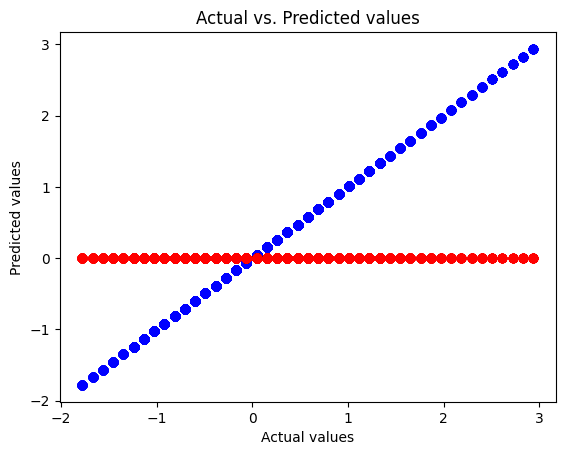

In [ ]:
import matplotlib.pyplot as plt

# plot the actual values
plt.scatter(y_test, y_test, color='blue')

# plot the predicted values
plt.scatter(y_test, y_pred, color='red')

# add labels and title
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs. Predicted values')

# show the plot
plt.show()